In [2]:
from sqlalchemy import create_engine
import pandas.io.sql as psql

engine = create_engine('postgresql+psycopg2://w9i@localhost/w9i')

def read_sql_query(query):
    with engine.connect() as connection:
        result = psql.read_sql(query, connection).style.set_properties(**{'text-align': 'left'})
        return result
    
read_sql_query('select * from book')

,book_id,title,author,price,amount
0,1,Мастер и Маргарита,Булгаков М.А.,670.990000,3
1,2,Белая гвардия,Булгаков М.А.,540.500000,5
2,3,Идиот,Достоевский Ф.М.,460.000000,10
3,4,Братья Карамазовы,Достоевский Ф.М.,799.010000,2
4,6,Стихотворения и поэмы,Есенин С.А.,650.000000,15


# Задание
### В конце года цену всех книг на складе пересчитывают – снижают ее на 30%. Написать SQL запрос, который из таблицы book выбирает названия, авторов, количества и вычисляет новые цены книг. Столбец с новой ценой назвать new_price, цену округлить до 2-х знаков после запятой.

In [3]:
read_sql_query("""
SELECT title, author, amount,
    ROUND(price - (0.3 * price), 2) AS new_price
FROM book
""")

,title,author,amount,new_price
0,Мастер и Маргарита,Булгаков М.А.,3,469.690000
1,Белая гвардия,Булгаков М.А.,5,378.350000
2,Идиот,Достоевский Ф.М.,10,322.000000
3,Братья Карамазовы,Достоевский Ф.М.,2,559.310000
4,Стихотворения и поэмы,Есенин С.А.,15,455.000000


<h2>Выборка данных, вычисляемые столбцы, логические&nbsp;функции</h2>

<p>В SQL реализована возможность заносить в поле значение в зависимости от условия. 
    Для этого используется функция <code>IF()</code>:</p>

<code class="language-sql hljs">IF(логическое_выражение, выражение_1, выражение_2)</code>

<p>Функция вычисляет <code>логическое_выражение,</code> если оно истина – в поле заносится значение <code>выражения_1</code>, в противном случае –&nbsp; значение <code>выражения_2. </code>Все три параметра <code>IF() </code>являются обязательными.</p>

<p>Допускается использование вложенных функций, вместо <code>выражения_1</code> или <code>выражения_2</code> может стоять новая функция <code><strong>IF</strong></code>.</p>

<p><strong>Пример&nbsp;</strong></p>

<p>Для каждой книги из таблицы <code><strong>book</strong></code>&nbsp;установим скидку следующим образом: если количество книг меньше 4, то скидка будет составлять 50% от цены, в противном случае 30%.</p>

<p>В PostgreSQL вместо&nbsp;<code>IF</code>&nbsp; используют конструкцию&nbsp;<code>CASE ... WHEN ... THEN ... ELSE ... END</code>&nbsp;и <a href="https://www.postgresql.org/docs/12/functions-conditional.html" rel="noopener noreferrer nofollow" target="_blank">некоторые другие</a>.</p>

<code class="hljs ada">...
    <span class="hljs-keyword">CASE</span>
        <span class="hljs-keyword">WHEN</span> author = <span class="hljs-symbol">'Text</span> <span class="hljs-number">1</span>' <span class="hljs-keyword">THEN</span> price * <span class="hljs-number">2</span>
        <span class="hljs-keyword">WHEN</span> author = <span class="hljs-symbol">'Text</span> <span class="hljs-number">2</span>' <span class="hljs-keyword">THEN</span> price * <span class="hljs-number">3</span>
        <span class="hljs-keyword">ELSE</span> price <span class="hljs-keyword">END</span>
...</code>

In [4]:
read_sql_query("""
SELECT title, amount, price, 
    ROUND(CASE
        WHEN amount < 4 THEN price*0.5
        ELSE price*0.7 END, 2) AS sale
FROM book
""")

,title,amount,price,sale
0,Мастер и Маргарита,3,670.990000,335.500000
1,Белая гвардия,5,540.500000,378.350000
2,Идиот,10,460.000000,322.000000
3,Братья Карамазовы,2,799.010000,399.510000
4,Стихотворения и поэмы,15,650.000000,455.000000


<p><strong>Пример</strong></p>

<p>Усложним вычисление скидки в зависимости от количества книг.&nbsp;Если количество книг меньше 4 – то скидка 50%, меньше 11&nbsp;– 30%, в остальных случаях – 10%. И еще укажем какая именно скидка на каждую книгу.</p>

In [5]:
read_sql_query("""
SELECT title, amount, price,
ROUND(
    CASE
        WHEN amount < 4 THEN price * 0.5
        ELSE
            CASE
                WHEN amount < 11 THEN price * 0.7
                ELSE price * 0.9
                END
        END
,2) AS sale,
CASE
    WHEN amount<4 THEN 'скидка 50%%'
    ELSE
        CASE
            WHEN amount < 11 THEN 'скидка 30%%'
            ELSE 'скидка 10%%'
            END
    END AS Ваша_скидка
FROM book
""")

,title,amount,price,sale,Ваша_скидка
0,Мастер и Маргарита,3,670.990000,335.500000,скидка 50%
1,Белая гвардия,5,540.500000,378.350000,скидка 30%
2,Идиот,10,460.000000,322.000000,скидка 30%
3,Братья Карамазовы,2,799.010000,399.510000,скидка 50%
4,Стихотворения и поэмы,15,650.000000,585.000000,скидка 10%


## Задание

#### <p>При анализе продаж книг выяснилось, что наибольшей популярностью пользуются книги Михаила Булгакова, на втором месте книги Сергея Есенина. Исходя из этого решили поднять цену книг Булгакова на 10%, а цену книг Есенина - на 5%. Написать запрос, куда включить автора, название книги и новую цену, последний столбец назвать <code><strong>new_price</strong></code>. Значение округлить до двух знаков после запятой.</p>

In [6]:
read_sql_query("""
SELECT author, title,
ROUND(
CASE
    WHEN author = 'Булгаков М.А.' THEN (price*0.10) + price
    WHEN author = 'Есенин С.А.' THEN (price*0.05) + price
    ELSE price
    END ,2) AS new_price
FROM book
""")

,author,title,new_price
0,Булгаков М.А.,Мастер и Маргарита,738.090000
1,Булгаков М.А.,Белая гвардия,594.550000
2,Достоевский Ф.М.,Идиот,460.000000
3,Достоевский Ф.М.,Братья Карамазовы,799.010000
4,Есенин С.А.,Стихотворения и поэмы,682.500000


## Выборка данных по усовию
<p>С помощью запросов можно включать в итоговую выборку не все строки исходной таблицы, а только те, которые отвечают некоторому условию. Для этого после указания таблицы, откуда выбираются данные, задается ключевое слово <code>WHERE</code> и логическое выражение, от результата которого зависит будет ли включена строка в выборку или нет. Если условие – истина, то строка(запись) &nbsp;включается в выборку, если ложь – нет.</p>

<p>Логическое выражение может включать <strong>операторы сравнения&nbsp;</strong>(равно «<strong>=</strong>», не равно «<strong>&lt;&gt;</strong>», больше «<strong>&gt;</strong>», меньше «<strong>&lt;</strong>», больше или равно«<strong>&gt;=</strong>», меньше или равно «<strong>&lt;=</strong>») и выражения, допустимые в SQL.</p>

### Пример

<p>Вывести название и цену тех книг, цены которых меньше 600 рублей.</p>

In [7]:
read_sql_query("""
SELECT title, price
FROM book
WHERE price < 600
""")

,title,price
0,Белая гвардия,540.500000
1,Идиот,460.000000


### Пример

<p>Вывести название, автора&nbsp; и стоимость (цена умножить на количество) тех книг, стоимость которых&nbsp;больше 4000 рублей</p>

In [8]:
read_sql_query("""
SELECT title, author, price * amount AS total
FROM book
WHERE price * amount > 4000
""")

,title,author,total
0,Идиот,Достоевский Ф.М.,4600.000000
1,Стихотворения и поэмы,Есенин С.А.,9750.000000


## Задание
### Вывести автора, название  и цены тех книг, количество которых меньше 10.

In [9]:
read_sql_query("""
SELECT author, title, price
FROM book
WHERE amount < 10
""")

,author,title,price
0,Булгаков М.А.,Мастер и Маргарита,670.990000
1,Булгаков М.А.,Белая гвардия,540.500000
2,Достоевский Ф.М.,Братья Карамазовы,799.010000


## Выборка данных, логические операции.

<p><strong>&nbsp;</strong>Логическое выражение после ключевого слова <code>WHERE</code> кроме операторов сравнения&nbsp; и выражений может включать &nbsp;<strong>логические операции</strong>&nbsp;(И «<strong>and</strong>», ИЛИ «<strong>or</strong>», НЕ «<strong>not</strong>») и круглые скобки, изменяющие приоритеты выполнения операций.</p>

<p>Приоритеты операций:</p>

<ol>
	<li>круглые скобки</li>
	<li>умножение &nbsp;(*), &nbsp;деление (/)</li>
	<li>сложение &nbsp;(+), вычитание (-)</li>
	<li>операторы сравнения (=, &gt;, &lt;, &gt;=, &lt;=, &lt;&gt;)</li>
	<li>NOT</li>
	<li>AND</li>
	<li>OR</li>
</ol>

### Пример
<p>Вывести название, автора и цену тех книг, которые написал Булгаков, ценой больше 600 рублей</p>

In [10]:
read_sql_query("""
SELECT title, author, price
FROM book
WHERE price > 600 AND author = 'Булгаков М.А.'
""")

,title,author,price
0,Мастер и Маргарита,Булгаков М.А.,670.990000


## Пример
<p>Вывести название,&nbsp;цену&nbsp; тех книг, которые написал Булгаков или Есенин, ценой больше 600 рублей</p>

In [11]:
read_sql_query("""
SELECT title, author, price
FROM book
WHERE (author = 'Булгаков М.А.' OR author = 'Есенин С.А.') AND price > 600
""")

,title,author,price
0,Мастер и Маргарита,Булгаков М.А.,670.990000
1,Стихотворения и поэмы,Есенин С.А.,650.000000


### Пояснение

<p>В данном запросе обязательно нужно поставить скобки, так как без них сначала вычисляется &nbsp;<code>author = 'Есенин С.А.' and price &gt; 600,</code> а потом уже выражение через <code>or</code>. Без скобок были бы&nbsp;отобраны все книги Булгакова и те книги Есенина, цена которых больше 600.</p>

In [12]:
read_sql_query("""
SELECT title, author, price 
FROM book
WHERE author = 'Булгаков М.А.' OR author = 'Есенин С.А.' AND price > 600
""")

,title,author,price
0,Мастер и Маргарита,Булгаков М.А.,670.990000
1,Белая гвардия,Булгаков М.А.,540.500000
2,Стихотворения и поэмы,Есенин С.А.,650.000000


<h2>Задание</h2>

<p>Вывести название, автора, &nbsp;цену &nbsp;и количество всех книг, цена которых меньше 500 или больше 600, а стоимость всех экземпляров этих книг&nbsp;больше или равна 5000.</p>

In [13]:
read_sql_query("""
SELECT title, author, price, amount
FROM book
WHERE (price < 500 OR price > 600) AND amount*price >= 5000
""")

,title,author,price,amount
0,Стихотворения и поэмы,Есенин С.А.,650.000000,15


<h2>Выборка данных, операторы BETWEEN, IN</h2>

<p><strong>&nbsp;</strong>Логическое выражение после ключевого слова <code>WHERE</code> может включать операторы &nbsp;<strong><code>BETWEEN</code></strong> и <strong><code>IN</code></strong>. Приоритет&nbsp; у этих операторов такой же как у операторов сравнения, то есть они выполняются раньше, чем <code><strong>NOT</strong></code>, <code><strong>AND</strong>,</code> <code><strong>OR</strong></code>.</p>

<p>Оператор <code>BETWEEN</code> позволяет отобрать данные, относящиеся к некоторому интервалу, включая его границы.</p>

<p><strong>Пример</strong></p>

<p>Выбрать названия и количества тех книг, количество которых от 5 до 14 включительно.</p>

In [14]:
read_sql_query("""
SELECT title, amount
FROM book
WHERE amount BETWEEN 5 AND 14
""")

,title,amount
0,Белая гвардия,5
1,Идиот,10


<p>Этот запрос можно реализовать по-другому, результат будет точно такой же.</p>

In [15]:
read_sql_query("""
SELECT title, amount
FROM book
WHERE amount >= 5 AND amount <= 14
""")

,title,amount
0,Белая гвардия,5
1,Идиот,10


<p><strong>Пример</strong></p>

<p>Выбрать названия и цены&nbsp;книг, написанных Булгаковым или Достоевским.</p>

In [16]:
read_sql_query("""
SELECT title, price
FROM book
WHERE author IN ('Булгаков М.А.', 'Достоевский Ф.М.')
""")

,title,price
0,Мастер и Маргарита,670.990000
1,Белая гвардия,540.500000
2,Идиот,460.000000
3,Братья Карамазовы,799.010000


<p>Этот запрос можно реализовать по-другому, результат будет точно такой же.</p>

In [17]:
read_sql_query("""
SELECT title, price 
FROM book
WHERE author = 'Булгаков М.А.' OR author = 'Достоевский Ф.М.';
""")

,title,price
0,Мастер и Маргарита,670.990000
1,Белая гвардия,540.500000
2,Идиот,460.000000
3,Братья Карамазовы,799.010000


<h2>Задание</h2>

<p>Вывести название и авторов тех книг, цены которых принадлежат интервалу от 540.50 до 800 (включая границы), &nbsp;а количество или 2, или 3, или 5, или 7 .</p>

In [18]:
read_sql_query("""
SELECT title, author
FROM book
WHERE (price BETWEEN 540.50 AND 800) AND amount IN (2, 3, 5)
""")

,title,author
0,Мастер и Маргарита,Булгаков М.А.
1,Белая гвардия,Булгаков М.А.
2,Братья Карамазовы,Достоевский Ф.М.


<h2>Выборка данных с сортировкой</h2>

<p>При выборке можно указывать столбец или несколько столбцов, по которым необходимо отсортировать отобранные строки. Для этого используются ключевые слова <code>ORDER BY</code>, после которых задаются имена столбцов. При этом строки сортируются по первому столбцу, если указан второй столбец, сортировка осуществляется только для тех строк, у которых&nbsp;значения первого столбца одинаковы. По умолчанию&nbsp;<code>ORDER BY</code> выполняет сортировку по возрастанию. Чтобы управлять направлением сортировки вручную, после имени столбца указывается ключевое слово <code>ASC</code> (по возрастанию) или <code>DESC</code> (по убыванию).&nbsp;</p>

<p>Столбцы после ключевого слова <code>ORDER BY</code> можно задавать:</p>

<ul>
	<li>названием столбца;</li>
	<li>номером столбца;</li>
	<li>именем столбца (указанным после <code>AS</code>).</li>
</ul>

<strong>Пример</strong>

<p>Вывести название, автора и цены книг. Информацию &nbsp;отсортировать по названиям книг&nbsp;в алфавитном порядке.</p>

In [21]:
read_sql_query("""
SELECT title, author, price
FROM book
ORDER BY title
""")

,title,author,price
0,Белая гвардия,Булгаков М.А.,540.500000
1,Братья Карамазовы,Достоевский Ф.М.,799.010000
2,Идиот,Достоевский Ф.М.,460.000000
3,Мастер и Маргарита,Булгаков М.А.,670.990000
4,Стихотворения и поэмы,Есенин С.А.,650.000000


<p>Аналогичный результат получится при использовании запроса:</p>

In [22]:
read_sql_query("""
SELECT title, author, price
FROM book
ORDER BY 1;
""")

,title,author,price
0,Белая гвардия,Булгаков М.А.,540.500000
1,Братья Карамазовы,Достоевский Ф.М.,799.010000
2,Идиот,Достоевский Ф.М.,460.000000
3,Мастер и Маргарита,Булгаков М.А.,670.990000
4,Стихотворения и поэмы,Есенин С.А.,650.000000


## Пример

<p>Вывести автора, название и количество&nbsp;книг, в отсортированном в алфавитном порядке по автору и по убыванию количества, для тех книг, цены которых меньше 750 рублей.</p>

In [25]:
read_sql_query("""
SELECT author, title, amount AS Количество
FROM book
WHERE price < 750
ORDER BY author, amount DESC;
""")

,author,title,Количество
0,Булгаков М.А.,Белая гвардия,5
1,Булгаков М.А.,Мастер и Маргарита,3
2,Достоевский Ф.М.,Идиот,10
3,Есенин С.А.,Стихотворения и поэмы,15


<p>Можно использовать другие варианты записи запроса:</p>

In [26]:
read_sql_query("""
SELECT author, title, amount AS Количество
FROM book
WHERE price < 750
ORDER BY author, Количество DESC;
""")

,author,title,Количество
0,Булгаков М.А.,Белая гвардия,5
1,Булгаков М.А.,Мастер и Маргарита,3
2,Достоевский Ф.М.,Идиот,10
3,Есенин С.А.,Стихотворения и поэмы,15


In [27]:
read_sql_query("""
SELECT author, title, amount AS Количество
FROM book
WHERE price < 750
ORDER BY 1, 3 DESC;
""")

,author,title,Количество
0,Булгаков М.А.,Белая гвардия,5
1,Булгаков М.А.,Мастер и Маргарита,3
2,Достоевский Ф.М.,Идиот,10
3,Есенин С.А.,Стихотворения и поэмы,15


<p><strong>Важно! </strong>Если названия столбцов заключены в кавычки, то при использовании их в сортировке, необходимо записывать их БЕЗ КАВЫЧЕК.</p>

## Задание

<p>Вывести &nbsp;автора и название &nbsp;книг, количество которых принадлежит интервалу от 2 до 14 (включая границы).&nbsp;Информацию &nbsp;отсортировать сначала по авторам (в обратном алфавитном порядке), а затем по названиям книг (по алфавиту).</p>

In [28]:
read_sql_query("""
SELECT author, title
FROM book
WHERE amount BETWEEN 2 AND 14
ORDER BY author DESC, title
""")

,author,title
0,Достоевский Ф.М.,Братья Карамазовы
1,Достоевский Ф.М.,Идиот
2,Булгаков М.А.,Белая гвардия
3,Булгаков М.А.,Мастер и Маргарита


<h2>Выборка данных, оператор LIKE</h2>

<p>Оператор <code>LIKE</code> используется для сравнения строк. В отличие от операторов отношения равно (<strong>=</strong>) и не равно (<strong>&lt;&gt;</strong>), <code>LIKE</code> позволяет сравнивать строки не на полное совпадение (не совпадение), а в соответствии с шаблоном.&nbsp;Шаблон может включать <strong>обычные символы</strong> и <strong>символы-шаблоны</strong>.&nbsp;При сравнении с шаблоном,&nbsp;его обычные символы должны в точности совпадать с символами, указанными в строке.&nbsp;Символы-шаблоны могут совпадать с произвольными элементами символьной строки.</p>

<table border="1">
	<thead>
		<tr style="background-color: #e6f8e0; background: #e6f8e0; text-align: center;">
			<th><sup>Символ-шаблон</sup></th>
			<th>Описание</th>
			<th>Пример</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td><strong>%</strong></td>
			<td>Любая строка, содержащая ноль или более символов</td>
			<td><code>SELECT * FROM book WHERE author LIKE '%М.%' </code><br>
			выполняет поиск и выдает все книги, инициалы авторов которых содержат «<em>М.</em>»</td>
		</tr>
		<tr>
			<td><strong>_ </strong><sup>(подчеркивание)</sup></td>
			<td>Любой одиночный символ</td>
			<td><code>SELECT * FROM book WHERE title LIKE 'Поэм_' </code><br>
			выполняет поиск и выдает все книги, названия которых либо «<em>Поэма</em>», либо «<em>Поэмы</em>» и пр.</td>
		</tr>
	</tbody>
</table>

In [31]:
read_sql_query("""
SELECT * FROM book WHERE author LIKE '%%М.%%'
""")

,book_id,title,author,price,amount
0,1,Мастер и Маргарита,Булгаков М.А.,670.990000,3
1,2,Белая гвардия,Булгаков М.А.,540.500000,5
2,3,Идиот,Достоевский Ф.М.,460.000000,10
3,4,Братья Карамазовы,Достоевский Ф.М.,799.010000,2


## Пример 1

<p>Вывести названия книг, начинающихся с буквы&nbsp;«<em>Б</em>».</p>

In [37]:
read_sql_query("""
SELECT title 
FROM book
WHERE title LIKE 'Б%%';
/* эквивалентное условие 
title LIKE 'б%%'
*/
""")

,title
0,Белая гвардия
1,Братья Карамазовы


## Пример 2

<p>Вывести название книг, состоящих ровно из 5 букв.</p>

In [39]:
read_sql_query("""
SELECT title FROM book
WHERE title LIKE '_____'
""")

,title
0,Идиот


## Пример 3

<p>Вывести книги, название которых длиннее 5 символов:</p>

In [41]:
read_sql_query("""
SELECT title FROM book
WHERE title LIKE '______%%'
/* эквивалентные условия 
title LIKE "%%______"
title LIKE "%%______%%"
*/
""")

,title
0,Мастер и Маргарита
1,Белая гвардия
2,Братья Карамазовы
3,Стихотворения и поэмы


## Пример 4

<p>Вывести названия книг, которые содержат букву <strong>"и"</strong> как отдельное слово, если считать, что слова в названии отделяются друг от друга пробелами и не содержат знаков препинания.</p>

In [42]:
read_sql_query("""
SELECT title FROM book
WHERE title LIKE '_%% и _%%' /* отбирает слово И внутри названия */
    OR title LIKE 'и _%%' /* отбирает слово И в начале названия */
    OR title LIKE '_%% и' /*отбирает слово И в конце названия */
    OR title LIKE 'и' /* отбирает название, состоящее из одного слова И */
""")

,title
0,Мастер и Маргарита
1,Стихотворения и поэмы


## Пример 5

<p>Вывести названия книг, которые состоят ровно из одного слова, если считать, что слова в названии отделяются друг от друга пробелами .</p>

In [45]:
read_sql_query("""
SELECT title FROM book
WHERE title NOT LIKE '%% %%'
""")

,title
0,Идиот


<h2>Задание</h2>

<p>Вывести название и автора тех книг, название которых состоит из двух и более слов, а инициалы автора содержат букву «С». Считать, что в названии слова отделяются друг от друга пробелами и не содержат знаков препинания, между фамилией автора и инициалами обязателен пробел, инициалы записываются без пробела в формате: буква, точка, буква, точка. Информацию отсортировать по названию книги в алфавитном порядке.</p>

In [66]:
read_sql_query("""
SELECT title, author FROM book
WHERE (title LIKE '%%_ _%%') AND (author LIKE '%%С.%%')
ORDER BY title
""")

,title,author
0,Стихотворения и поэмы,Есенин С.А.


<h2>Выбор уникальных элементов столбца</h2>

<p>Чтобы отобрать уникальные элементы некоторого столбца используется ключевое слово <code>DISTINCT</code>, которое размещается сразу после <code>SELECT</code>.</p>

<strong>Пример</strong>

<p>Выбрать различных&nbsp;авторов, книги которых хранятся в таблице<code><strong> book</strong></code>.</p>

In [67]:
read_sql_query("""
SELECT DISTINCT author
FROM book;
""")

,author
0,Есенин С.А.
1,Булгаков М.А.
2,Достоевский Ф.М.


<p>Другой способ – использование оператора <code>GROUP BY</code>, который группирует данные при выборке, имеющие одинаковые значения в некотором столбце. Столбец, по которому осуществляется группировка, указывается после <code>GROUP BY</code>&nbsp;.</p>

<p>С помощью <code>GROUP BY</code>&nbsp;можно выбрать уникальные элементы столбца, по которому осуществляется группировка. Результат будет точно такой же как при использовании <code>DISTINCT</code>.</p>

In [68]:
read_sql_query("""
SELECT author
FROM book
GROUP BY author
""")

,author
0,Есенин С.А.
1,Булгаков М.А.
2,Достоевский Ф.М.


<h2>Задание</h2>

<p>Отобрать различные (уникальные) элементы столбца <code><strong>amount</strong></code> таблицы<code><strong> book</strong></code>.</p>

In [71]:
read_sql_query("""
SELECT amount FROM book
GROUP BY amount
""")

,amount
0,15
1,3
2,5
3,10
4,2


<h2>Выборка данных, групповые функции SUM&nbsp;и COUNT</h2>

<p>При группировке над элементами столбца, входящими в группу можно выполнить различные действия, например, просуммировать их или найти количество элементов в группе.</p>

<p>Подробно рассмотрим, как осуществляется группировка данных по некоторому столбцу и вычисления над группой на следующем примере:</p>

In [80]:
read_sql_query("""
SELECT author, sum(amount), count(amount)
FROM book
GROUP by author
""")

,author,sum,count
0,Есенин С.А.,15,1
1,Булгаков М.А.,8,2
2,Достоевский Ф.М.,23,3


<p>1. В таблице <code><strong>book</strong></code> определяются строки, в которых в столбце <code><strong>author</strong></code> одинаковые значения:</p>

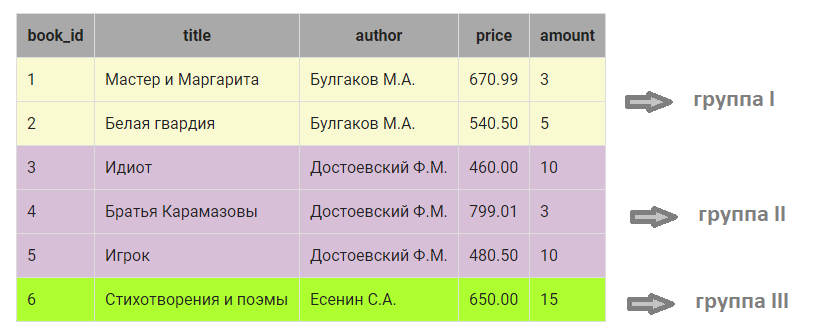

<p>Получили 3 различные группы:</p>

<ul>
	<li><strong>группа I</strong> объединяет две записи, у которых в столбце <code><strong>author</strong></code> значение Булгаков&nbsp;М.А.;</li>
	<li><strong>группа II</strong> объединяет три записи, у которых в столбце <code><strong>author</strong></code> значение Достоевский Ф.М.;</li>
	<li><strong>группа III</strong> объединяет одну запись, у которой в столбце <code><strong>author</strong></code> значение Есенин С.А.</li>
</ul>

<p>2. Вместо каждой группы в результирующий запрос включается&nbsp; одна запись. Запись как минимум включает значение столбца, по которому осуществляется группировка (в нашем случае это <code><strong>author</strong></code>):</p>

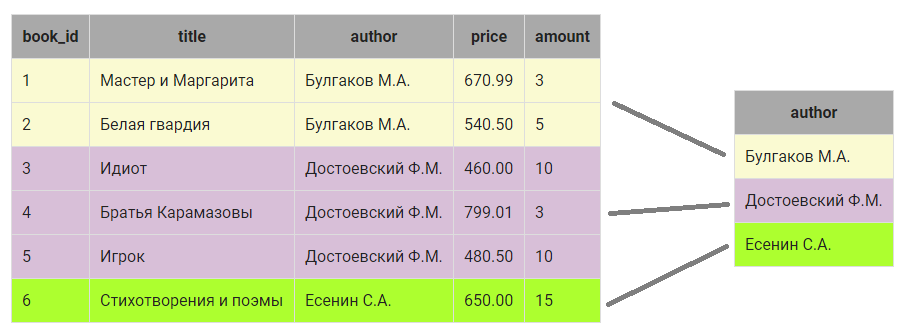

<p>3. Дальше можно выполнить вычисления над&nbsp;элементами КАЖДОЙ группы в отдельности, например, посчитать общее количество экземпляров книг каждого автора. Для этого используется групповая функция <code>SUM()</code>, а в скобках указывается столбец, по которому нужно выполнить суммирование ( в нашем случае <code><strong>amount</strong></code>):</p>

<p>4. Также можно посчитать, сколько записей относится к группе. Для этого используется функция <code>COUNT()</code>, в скобках можно указать ЛЮБОЙ столбец из группы, если группа не содержит пустых значений (ниже приведен пример, в котором показано, как работает <code><strong>COUNT()</strong></code>, если в группе есть пустые значения):</p>

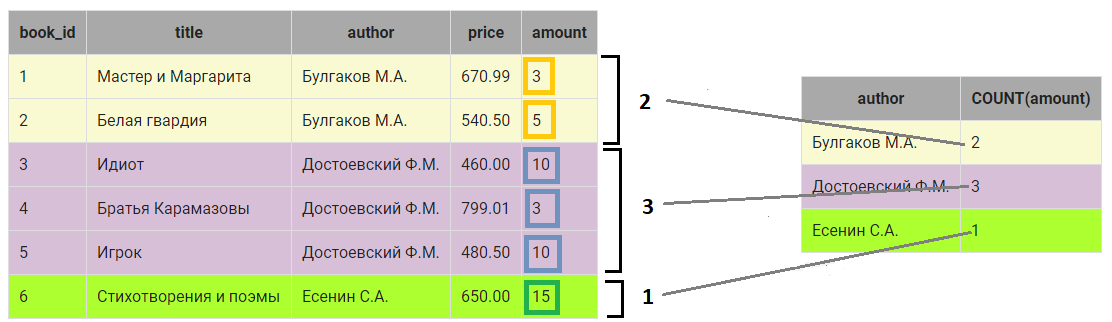

## Пример

<p>Посчитать, сколько экземпляров книг каждого автора хранится на складе.</p>

In [73]:
read_sql_query("""
SELECT author, SUM(amount)
FROM book
GROUP by author
""")

,author,sum
0,Есенин С.А.,15
1,Булгаков М.А.,8
2,Достоевский Ф.М.,12


## Пример

<p>Посчитать, сколько различных&nbsp;книг каждого автора хранится на складе.</p>

<p>Только для этого примера в таблицу<code><strong> book</strong></code> добавлена запись с пустыми значениями в столбцах <code><strong>amount</strong></code> и <code><strong>price</strong></code>:</p>

In [83]:
read_sql_query("""
/* чтобы проверить запрос, добавьте в таблицу строку */
INSERT INTO book (title, author, price, amount) 
VALUES ('Черный человек','Есенин С.А.', Null, Null);

SELECT author, COUNT(author) AS count_author, 
COUNT(amount) AS count_amount, COUNT(*) AS count_all
FROM book
GROUP BY author
""")

,author,count_author,count_amount,count_all
0,Есенин С.А.,2,1,2
1,Булгаков М.А.,2,2,2
2,Достоевский Ф.М.,3,3,3


<p>Из таблицы с результатами запроса видно, что&nbsp;функцию&nbsp;<code><strong>COUNT()</strong></code>&nbsp;можно применять к любому столбцу, в том числе можно использовать и <code><strong>*</strong></code>, если таблица не содержит пустых значений. Если же в столбцах есть значения <code><strong>Null</strong></code>, (для группы по автору Есенин в нашем примере), то</p>

<ul>
	<li><code><strong>COUNT(*) </strong></code>— &nbsp;подсчитывает&nbsp; все записи, относящиеся к группе, в том числе и со значением&nbsp;<code><strong>NULL</strong></code>;</li>
	<li><code><strong>COUNT(имя_столбца)</strong></code> —&nbsp;возвращает количество записей конкретного столбца (только <code><strong>NOT NULL</strong></code>), относящихся к группе.</li>
</ul>

<p><strong>ВАЖНО.</strong></p>

<ol>
	<li>Если столбец указан в&nbsp;<code>SELECT</code>&nbsp;&nbsp;<strong>БЕЗ&nbsp;</strong>применения групповой функции, то он обязательно должен быть указан и в<code>GROUP BY.</code>Иначе получим ошибку.</li>
	<li>Между названием функции и скобкой <span style="color: #ff4363;"><strong>НЕЛЬЗЯ СТАВИТЬ ПРОБЕЛ</strong></span>. Это особенность платформы.</li>
</ol>

<h2>Задание</h2>

<p>Посчитать, количество различных&nbsp;книг и количество экземпляров книг каждого автора&nbsp;, хранящихся на складе. &nbsp;Столбцы назвать <code><strong>Автор,</strong>&nbsp;<strong>Различных_книг</strong></code> и<strong> <code>Количество_экземпляров</code></strong> соответственно.</p>

In [86]:
read_sql_query("""
SELECT author AS Автор, count(title) AS Различных_книг, sum(amount) AS Количество_экземпляров
FROM book
GROUP BY author
""")

,Автор,Различных_книг,Количество_экземпляров
0,Есенин С.А.,1,15
1,Булгаков М.А.,2,8
2,Достоевский Ф.М.,3,23


<h2>Выборка данных, групповые функции MIN, MAX и AVG</h2>

<p>К групповым функциям SQL относятся: <code>MIN()</code>, <code>MAX()</code> и <code>AVG()</code>, которые вычисляют минимальное, максимальное и среднее значение элементов столбца, относящихся к группе.</p>

<strong>Пример</strong>

<p>Вывести минимальную цену книги каждого автора</p>

In [87]:
read_sql_query("""
SELECT author, MIN(price) AS min_price
FROM book
GROUP BY author
""")

,author,min_price
0,Есенин С.А.,650.000000
1,Булгаков М.А.,540.500000
2,Достоевский Ф.М.,460.000000


<h2>Задание</h2>

<p>Вывести фамилию и инициалы автора, минимальную, максимальную и среднюю цену книг каждого автора . Вычисляемые столбцы назвать <strong>Минимальная_цена, Максимальная_цена</strong> и<strong> Средняя_цена</strong> соответственно.</p>

In [89]:
read_sql_query("""
SELECT author, 
MIN(price) AS Минимальная_цена, 
MAX(price) AS Максимальная_цена, 
AVG(price) AS Средняя_цена
FROM book
GROUP BY author
""")

,author,Минимальная_цена,Максимальная_цена,Средняя_цена
0,Есенин С.А.,650.000000,650.000000,650.000000
1,Булгаков М.А.,540.500000,670.990000,605.745000
2,Достоевский Ф.М.,460.000000,799.010000,579.836667


<h2>Выборка данных c вычислением, групповые функции</h2>

<p>В качестве аргумента групповых функций &nbsp;SQL может использоваться не только столбец, но и любое допустимое в SQL арифметическое выражение.</p>

<strong>Пример</strong>

<p>Вывести суммарную стоимость книг каждого автора.</p>

